In [65]:
import numpy as np
import pandas as pd

# Reading Data

In [66]:
df = pd.read_csv("../vacancies.csv")
df.head(10)

,title,company,experience,salary,views,applications,technologies
0,Senior Python Developer_Competency Lead,Develux,5,NaN,15,1,"subscription,paid,schedule,benefits,courses,ma..."
1,Python Engineer,Lemberg Solutions,3,NaN,41,9,"accounting,meticulously,paid,workshops,ability..."
2,Middle/ Middle+ Back-end Python Developer,ARENA CS,3,1000.0,67,22,"рішення,супроводжувати,бізнесу,наша,рівні,підх..."
3,Automation QA Middle (Python) Engineer,Delphi Software,3,1500.0,31,7,"manual,gatling,paid,schedule,language,system,s..."
4,Senior Django Developer,Encomane,3,NaN,66,27,"mysql,ап,консалтингова,робота,agreements,самос..."
5,Junior Python Verification Engineer,PLVision,3,1000.0,53,7,"vacancy,programming,language,system,cisco,netw..."
6,QA Automation Engineer,PLVision,3,1500.0,36,5,"vacancy,pytest,ability,traffic,networking,basi..."
7,Middle Python Developer,Starnavi,2,NaN,122,25,"regular,paid,chill,training,courses,make,value..."
8,Str.Middle/Senior Python Developer,Argument,5,5500.0,86,36,"proficient,language,таланти,domain,data,respon..."
9,Full-Stack Developer (Python (Django) + React.js),ScrumLaunch,5,NaN,31,3,"next,ability,expertise,email,hubspot,system,le..."


# Visualization Top technologies on Djinni

<Axes: title={'center': 'Top technologies on Djinni for Python Developer'}, xlabel='Technologies', ylabel='Number of Vacancies'>

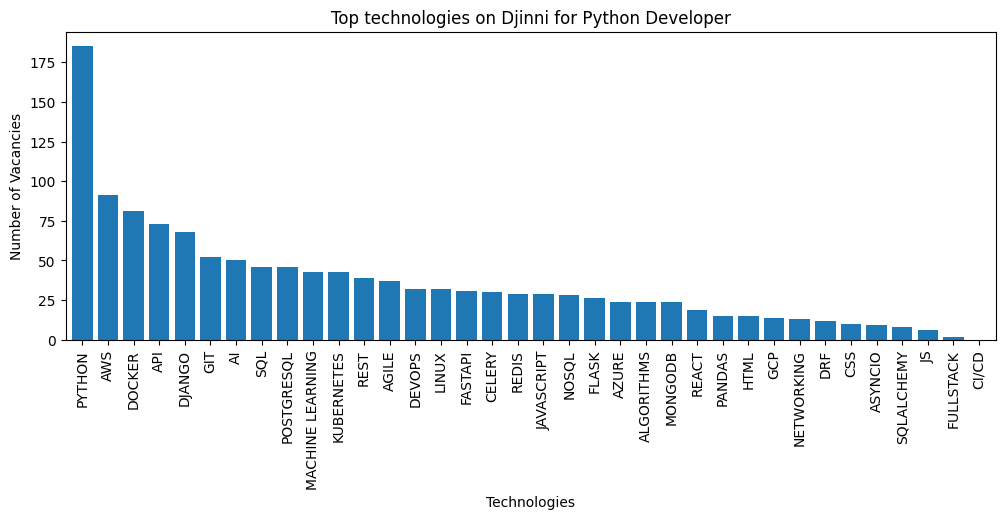

In [67]:
technologies_frequency = pd.get_dummies(df["technologies"].str.split(",").explode()).sum().sort_values(ascending=False)
technologies = np.array(["python", "js", "rest", "docker", "aws", "api", "django", "sql", "postgresql", "celery", "git", "ci/cd", "ai", "kubernetes", "flask", "redis", "drf", "sqlalchemy", "fullstack", "mongodb", "asyncio", "devops", "react", "javascript", "linux", "agile", "nosql", "machine", "fastapi", "algorithms", "azure", "gcp", "pandas", "networking", "css", "html"])
top_technologies = technologies_frequency.reindex(technologies, fill_value=0).rename(index={"machine": "machine learning"})
top_technologies.index = top_technologies.index.str.upper()
top_technologies = top_technologies.sort_values(ascending=False)

top_technologies.plot.bar(
    figsize=(12, 4),
    title="Top technologies on Djinni for Python Developer",
    xlabel="Technologies",
    ylabel="Number of Vacancies",
    width=0.8,
    legend=False,
)

# Visualization of Salary dependencies

<Axes: title={'center': 'Salary dependence on Experience'}, xlabel='Experience', ylabel='Salary'>

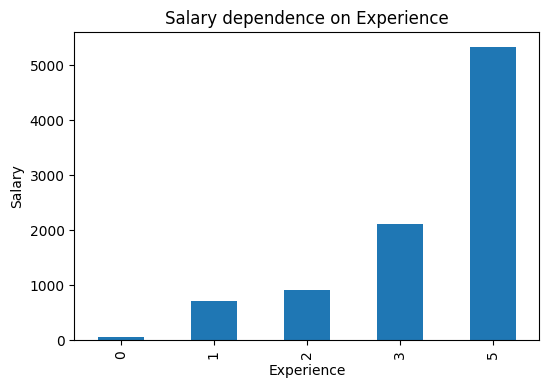

In [77]:
vacancies_with_salary = df.dropna(subset=["salary"]).copy()
salary_on_experience = vacancies_with_salary.groupby("experience")["salary"].mean()
salary_on_experience.plot.bar(xlabel="Experience", ylabel="Salary", figsize=(6,4), title="Salary dependence on Experience")

<Axes: title={'center': 'Applications dependence on Salary'}, xlabel='Salary', ylabel='Applications'>

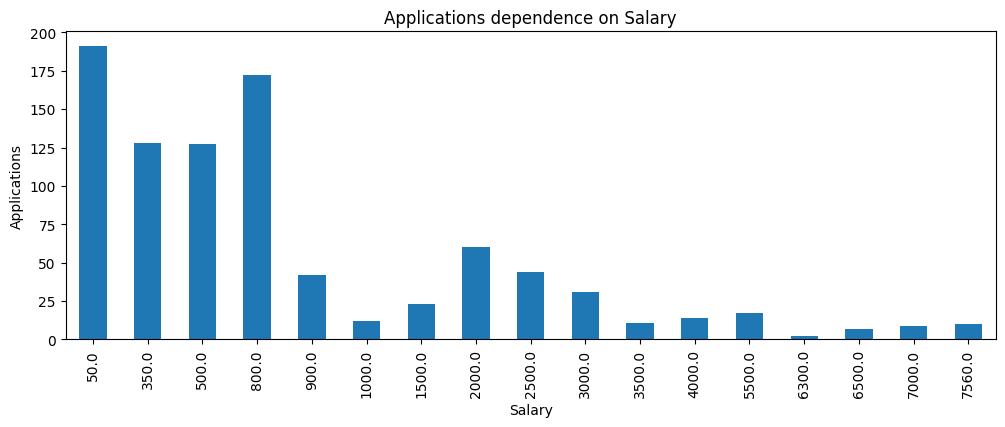

In [83]:
salary_on_applications = vacancies_with_salary.groupby("salary")["applications"].mean()
salary_on_applications.plot.bar(xlabel="Salary", ylabel="Applications", figsize=(12,4), title="Applications dependence on Salary")

<Axes: title={'center': 'Views dependence on Salary'}, xlabel='Salary', ylabel='Views'>

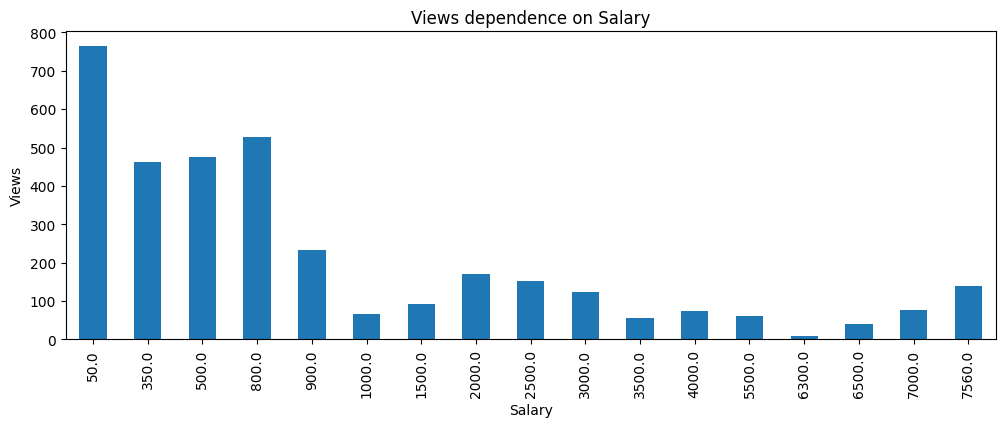

In [85]:
salary_on_views = vacancies_with_salary.groupby("salary")["views"].mean()
salary_on_views.plot.bar(xlabel="Salary", ylabel="Views", figsize=(12,4), title="Views dependence on Salary")